<a href="https://colab.research.google.com/github/buildwithdemis/machinelearning/blob/main/Capstone_01_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone 01: Analysis and Classification of IoT Attack Dataset**

In [2]:
# Download latest version
import pandas as pd

!wget https://raw.githubusercontent.com/buildwithdemis/machinelearning/refs/heads/main/All_Attacks.csv

# Read the text file containing data using pandas
dataset = pd.read_csv('All_Attacks.csv', delimiter=';')

# Print the data
# Because there are a lot of data, use head() to only print the first few rows
dataset.head(10)

--2025-06-08 00:24:53--  https://raw.githubusercontent.com/buildwithdemis/machinelearning/refs/heads/main/All_Attacks.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1124997 (1.1M) [text/plain]
Saving to: ‘All_Attacks.csv’

All_Attacks.csv     100%[===================>]   1.07M  --.-KB/s    in 0.07s   

2025-06-08 00:24:53 (15.3 MB/s) - ‘All_Attacks.csv’ saved [1124997/1124997]



,second,src,dst,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg,label
0,61.0,2,32,1,0.500000,1.000000,0.013889,1.000000,0.020000,37,0.500000,1.000000,0,0,0,1,1
1,61.0,4,32,1,0.500000,1.000000,0.986111,1.000000,1.419998,37,0.500000,1.000000,0,0,0,1,1
2,62.0,24,16,2,0.666667,0.666667,0.751425,0.751425,0.008049,187,0.785714,0.785714,0,0,2,0,1
3,62.0,16,24,1,0.333333,0.333333,0.248576,0.248576,0.002663,51,0.214286,0.214286,0,0,0,1,1
4,63.0,16,24,1,1.000000,1.000000,1.000000,1.000000,0.002953,60,1.000000,1.000000,0,0,0,2,1
5,65.0,3,32,1,0.500000,0.500000,0.987151,0.987151,0.330002,37,0.266187,0.266187,0,0,0,1,1
6,65.0,36,35,1,0.500000,0.500000,0.012849,0.012849,0.004295,102,0.733813,0.733813,1,0,0,0,1
7,66.0,34,49,1,0.333333,1.000000,0.000000,1.000000,0.000000,26,0.175676,1.000000,0,1,0,1,1
8,66.0,39,49,1,0.333333,1.000000,0.333331,1.000000,0.309998,26,0.175676,1.000000,0,1,0,1,1
9,66.0,41,49,1,0.333333,1.000000,0.666669,1.000000,0.620003,96,0.648649,1.000000,1,0,0,0,1


# Description of each column

**second** Simulation time in seconds when the packet or event was recorded. Useful for time-series or temporal pattern detection.

**src** Source node ID that sent the packet. Helps identify who initiated communication.

**dst** Destination node ID that received the packet. Together with src, this helps model communication patterns.

**packetcount** Number of packets exchanged in the given communication (or in the session/interval). Higher values might indicate abnormal activity like flooding.

**src_ratio** Proportion of total communication initiated by the source node (e.g., packets sent by src / total packets in session). Can reveal if a node is overly active.

**dst_ratio** Similar to src_ratio but for the destination node. Might be useful to detect unusual traffic received.

**src_duration_ratio** Proportion of time the source was involved in the communication compared to a time window/session. Possibly: src_duration / total_duration.

**dst_duration_ratio** Same as above but for destination node. Helps determine sustained targeting or behavior over time.

**TotalPacketDuration** Total time between first and last packet of the communication. Can help detect persistent vs. bursty traffic.

**TotalPacketLenght** Cumulative size of packets exchanged in bytes. Unusually high totals may suggest data exfiltration or flooding. (Note: “Lenght” is a typo — should be “Length”)

**src_packet_ratio** Ratio of packets sent by source node relative to total number of packets in the conversation/session.

**dst_packet_ratio** Ratio of packets received by destination node relative to total. A skewed value may suggest asymmetric behavior.

**DioCount** Number of DIO (DODAG Information Object) control messages sent — part of RPL (Routing Protocol for Low-Power and Lossy Networks). Could be used to detect routing manipulation or control-plane abuse.

**DisCount** Number of DIS (DODAG Information Solicitation) messages — used to request network topology info.

**DaoCount** Number of DAO (Destination Advertisement Object) messages — used to advertise destination routes.

**OtherMsg** Count of other message types not classified as DIO/DIS/DAO — possibly includes application or attack-specific traffic.

**label** Target variable. Value 1-5 for attack/malicious activity, and 0 for normal/benign behavior.


# Task 1: Data analysis and visualization

## Data Exploration

### 📊 Dataset Structure and Column Information

To display information about the dataset's structure, including the number of entries, column names, data types, and non-null counts, use the following command:


In [6]:
# prompt: Using dataframe dataset: display information about the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10845 entries, 0 to 10844
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   second               10845 non-null  float64
 1   src                  10845 non-null  int64  
 2   dst                  10845 non-null  int64  
 3   packetcount          10845 non-null  int64  
 4   src_ratio            10845 non-null  float64
 5   dst_ratio            10845 non-null  float64
 6   src_duration_ratio   10845 non-null  float64
 7   dst_duration_ratio   10845 non-null  float64
 8   TotalPacketDuration  10845 non-null  float64
 9   TotalPacketLenght    10845 non-null  int64  
 10  src_packet_ratio     10845 non-null  float64
 11  dst_packet_ratio     10845 non-null  float64
 12  DioCount             10845 non-null  int64  
 13  DisCount             10845 non-null  int64  
 14  DaoCount             10845 non-null  int64  
 15  OtherMsg             10845 non-null 

### Summary statistics


In [3]:
dataset.describe()

,second,src,dst,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg,label
count,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000,10845.000000
mean,338.096081,19.472476,28.188658,1.566805,0.290404,0.377594,0.287160,0.435793,0.065952,98.319779,0.293646,0.352207,0.166067,0.009129,0.060858,30.859751,2.986906
std,145.679764,11.932040,10.311293,0.968465,0.212384,0.214736,0.304885,0.368901,0.193742,76.864911,0.228556,0.207988,0.411911,0.095111,0.406267,34.764335,1.427846
min,60.000000,0.000000,0.000000,1.000000,0.034483,0.034483,0.000000,0.000000,0.000000,23.000000,0.017747,0.017747,0.000000,0.000000,0.000000,0.000000,1.000000
25%,216.000000,13.000000,18.000000,1.000000,0.111111,0.200000,0.030957,0.057098,0.004272,37.000000,0.094629,0.200000,0.000000,0.000000,0.000000,5.000000,2.000000
50%,343.000000,16.000000,30.000000,1.000000,0.235294,0.333333,0.149697,0.360374,0.009460,78.000000,0.234436,0.313725,0.000000,0.000000,0.000000,21.000000,3.000000
75%,460.000000,26.000000,32.000000,2.000000,0.444444,0.500000,0.500000,0.847793,0.029968,115.000000,0.446512,0.453333,0.000000,0.000000,0.000000,42.000000,4.000000
max,591.000000,50.000000,51.000000,10.000000,1.000000,1.000000,1.000000,1.000000,3.610001,715.000000,1.000000,1.000000,4.000000,1.000000,7.000000,291.000000,5.000000


### Distribution of attack classe

In [3]:
dataset['label'].value_counts()

,count
label,
1,2405
4,2273
3,2256
5,2102
2,1809


### Finding Missing Data

Do we have a complete dataset? we use `isnull()` to report the columns that have "empty" cells:


In [4]:
missing_data = dataset.isnull().sum().to_frame()
# Rename column holding the sums
missing_data = missing_data.rename(columns={0:'Empty Cells'})
missing_data

,Empty Cells
second,0
src,0
dst,0
packetcount,0
src_ratio,0
dst_ratio,0
src_duration_ratio,0
dst_duration_ratio,0
TotalPacketDuration,0
TotalPacketLenght,0


After running the check, we observe that there are no missing values in the dataset. Therefore, we can proceed with our analysis without needing to drop any rows or perform data imputation.

### 🎯 Target Variable Explanation: Understanding the label Field



The **label** field is our target. A value of 1-5 means that an attack/malicious activity did occur at the conditions described by the features, whereas a value of 0 means no attack/malicious activity happened
 *   1: -> SHA   
 *   2: -> DFA   
 *   3: -> SFA   
 *   4: -> SYA   
 *   5: -> VNA   

Because our targets can be a range of values from 0 or 5, we call this a multiclass classification model.

Now, let's plot the relationships between each feature and the target values. That helps us understand which features are more likely to influence the results:

### Description of each attack

•    SFA (Selective Forwarding Attack) – drops some packets to disrupt communication.

•    SHA (Sinkhole Attack) – lures traffic by faking optimal routes.

•    VNA (Version Number Attack) – misleads routing by sharing outdated version info.

•    DFA (DIS Flooding Attack) – floods network with excessive traffic (DoS-like).

•    SYA (Sybil Attack) – fakes multiple identities from a single node.

### Map Attack Labels to Names

In [5]:
attack_map = {
    1: 'SHA',
    2: 'DFA',
    3: 'SFA',
    4: 'SYA',
    5: 'VNA'
}

dataset['AttackType'] = dataset['label'].map(attack_map)

In [6]:
dataset['AttackType']

,AttackType
0,SHA
1,SHA
2,SHA
3,SHA
4,SHA
...,...
10840,VNA
10841,VNA
10842,VNA
10843,VNA


Now our dataset contains the AttackType column

In [8]:
dataset.sample(10)

,second,src,dst,packetcount,src_ratio,dst_ratio,src_duration_ratio,dst_duration_ratio,TotalPacketDuration,TotalPacketLenght,src_packet_ratio,dst_packet_ratio,DioCount,DisCount,DaoCount,OtherMsg,label,AttackType
4617,162.0,5,6,1,0.090909,0.090909,0.000000,0.000000,0.000000,23,0.031812,0.031812,0,0,0,13,3,SFA
2305,573.0,19,16,1,0.125000,0.125000,0.003106,0.003106,0.002502,45,0.113924,0.113924,0,0,0,36,1,SHA
10103,374.0,26,16,4,0.250000,0.937500,0.746013,1.000000,0.308350,392,0.285923,0.949672,0,0,4,48,5,VNA
647,239.0,16,21,1,0.500000,0.166667,0.528366,0.182049,0.003281,70,0.543243,0.189189,0,0,0,15,1,SHA
3152,308.0,16,28,1,0.500000,0.250000,0.523936,0.260638,0.002991,61,0.534783,0.265217,0,0,0,20,2,DFA
4373,112.0,1,32,1,0.500000,1.000000,0.944433,1.000000,0.169998,37,0.500000,1.000000,0,0,0,5,3,SFA
411,181.0,16,29,1,0.500000,0.125000,0.545455,0.127634,0.003235,69,0.567416,0.129213,0,0,0,17,1,SHA
5036,254.0,16,28,3,0.500000,0.500000,0.462565,0.462565,0.009521,201,0.446667,0.446667,0,0,0,26,3,SFA
9744,326.0,36,41,1,0.052632,0.052632,0.007615,0.007615,0.004303,102,0.067729,0.067729,1,0,0,0,5,VNA
6493,73.0,40,36,1,0.250000,0.250000,0.009251,0.009251,0.004295,102,0.375000,0.375000,1,0,0,0,4,SYA


## Class Distribution Visualization

<ipython-input-9-0c911d3b7b21>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AttackType', data=dataset, palette='Set2')


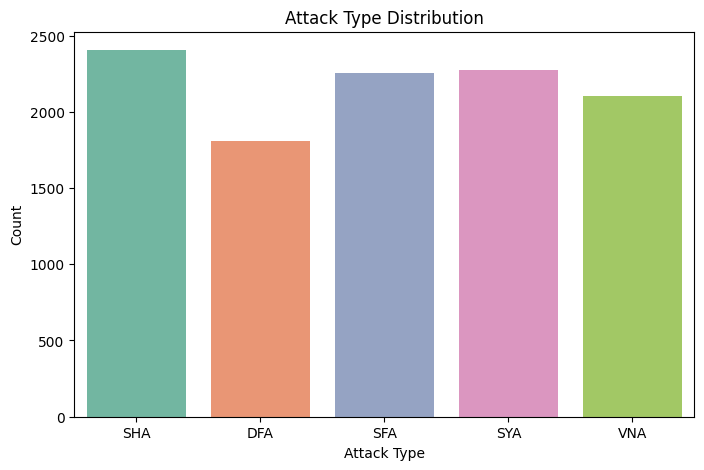

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 5))
sns.countplot(x='AttackType', data=dataset, palette='Set2')
plt.title('Attack Type Distribution')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.show()

## Message Counts by Attack Type

Stacked bar chart of message types per attack:

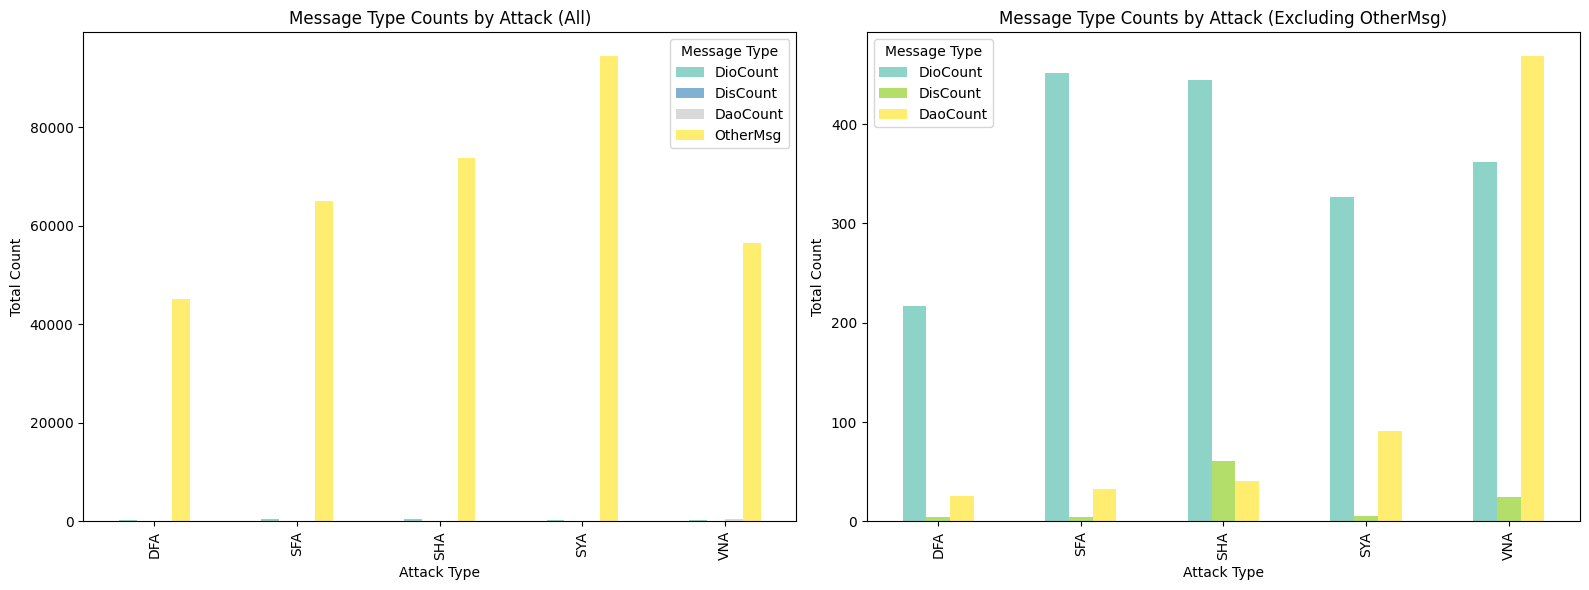

In [10]:
import matplotlib.pyplot as plt

# Grouping the data
full_counts = dataset.groupby('AttackType')[['DioCount', 'DisCount', 'DaoCount', 'OtherMsg']].sum()
partial_counts = dataset.groupby('AttackType')[['DioCount', 'DisCount', 'DaoCount']].sum()

# Set up the subplot layout (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: All message types
full_counts.plot(kind='bar', stacked=False, ax=axes[0], colormap='Set3')
axes[0].set_title('Message Type Counts by Attack (All)')
axes[0].set_ylabel('Total Count')
axes[0].set_xlabel('Attack Type')
axes[0].legend(title='Message Type')

# Plot 2: Without OtherMsg
partial_counts.plot(kind='bar', stacked=False, ax=axes[1], colormap='Set3')
axes[1].set_title('Message Type Counts by Attack (Excluding OtherMsg)')
axes[1].set_ylabel('Total Count')
axes[1].set_xlabel('Attack Type')
axes[1].legend(title='Message Type')

# Adjust layout
plt.tight_layout()
plt.show()

## Correlation Analysis

Now, let's plot the relationships between each feature and the target values. That helps us understand which features are more likely to influence the results:

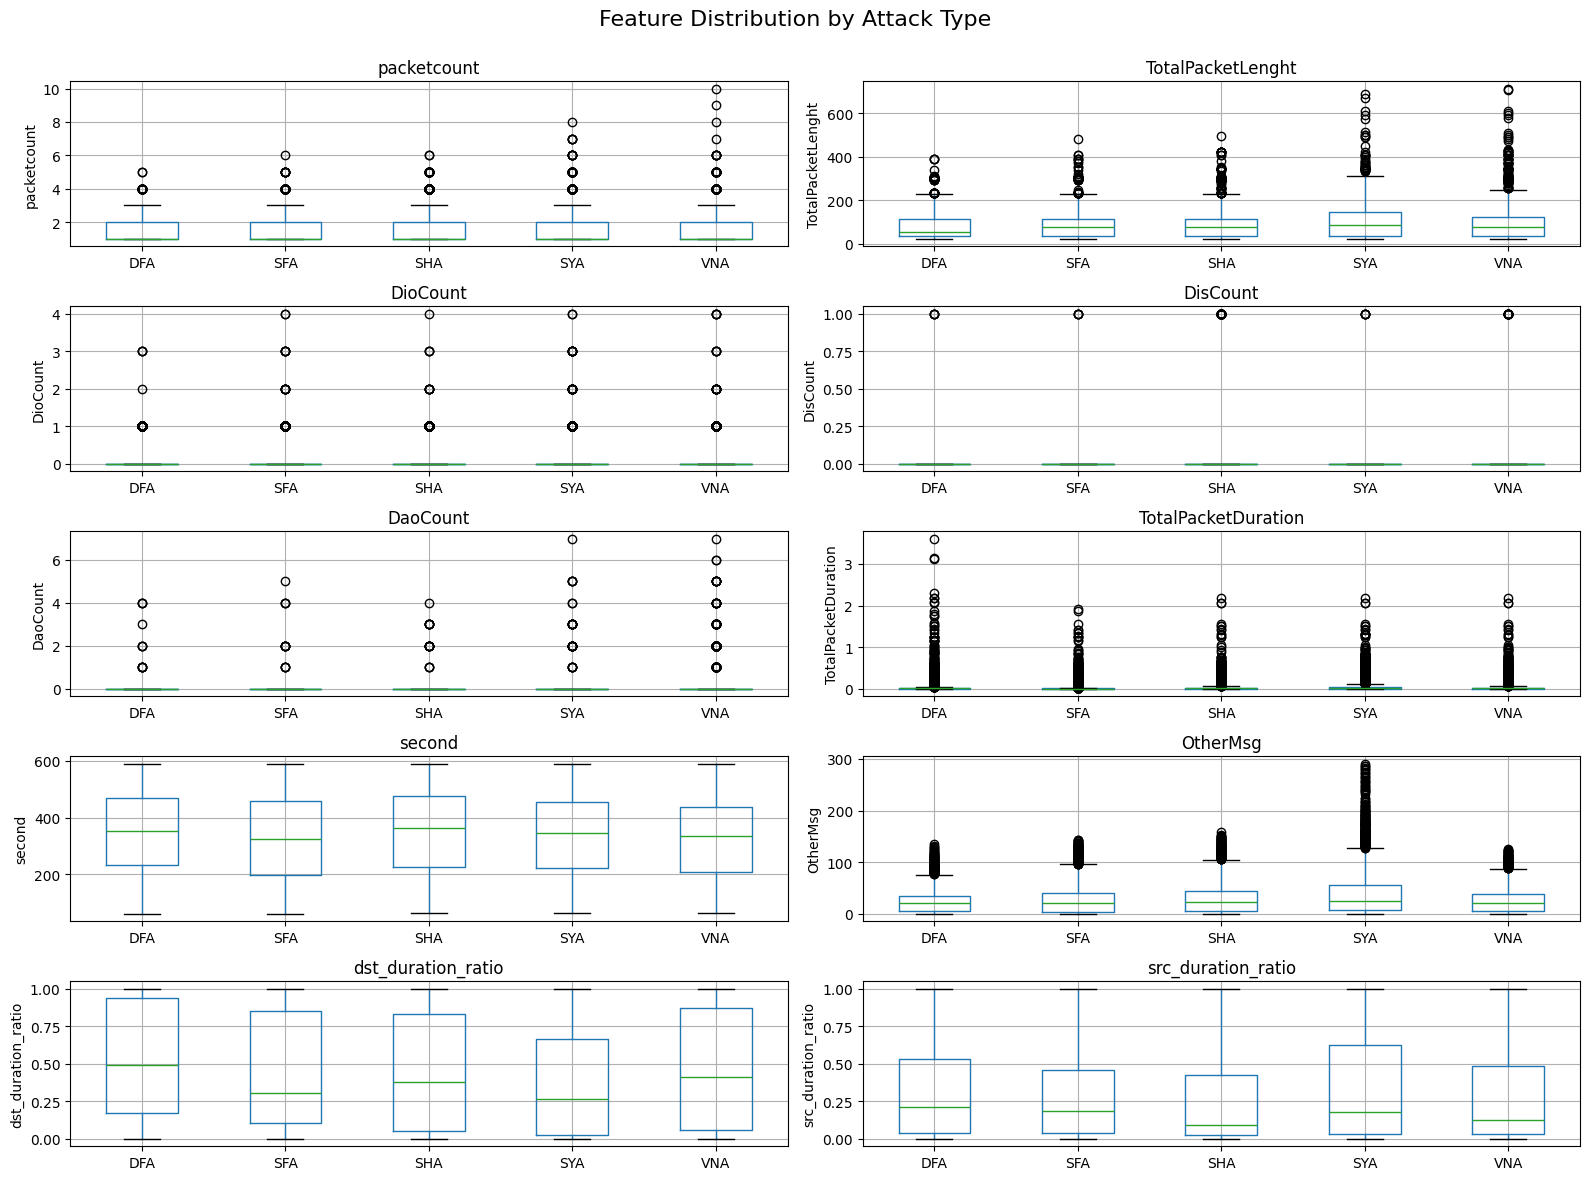

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

# Define features and label
attack_features = ['packetcount','TotalPacketLenght','DioCount','DisCount','DaoCount','TotalPacketDuration','second','OtherMsg',
                   'dst_duration_ratio','src_duration_ratio']
attack_label = 'AttackType'

# Create subplots: 5 rows x 2 columns
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16, 12))
axes = axes.flatten()  # Flatten to easily index

# Plot each feature
for i, col in enumerate(attack_features):
    dataset.boxplot(column=col, by=attack_label, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col)

# Hide any unused subplot (since we have 5 plots and 6 axes)
for j in range(len(attack_features), len(axes)):
    fig.delaxes(axes[j])

# Set the overall title and layout
plt.suptitle('Feature Distribution by Attack Type', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Adjust for suptitle
plt.show()

We observed that the following features

* packetcount
* TotalPacketLenght
* DioCount
* DaoCount
* TotalPacketDuration
* second
* OtherMsg
* dst_duration_ratio
* src_duration_ratio

show a positive correlation with the label.

## Feature Distributions

Plot distributions per feature, optionally grouped by attack type:

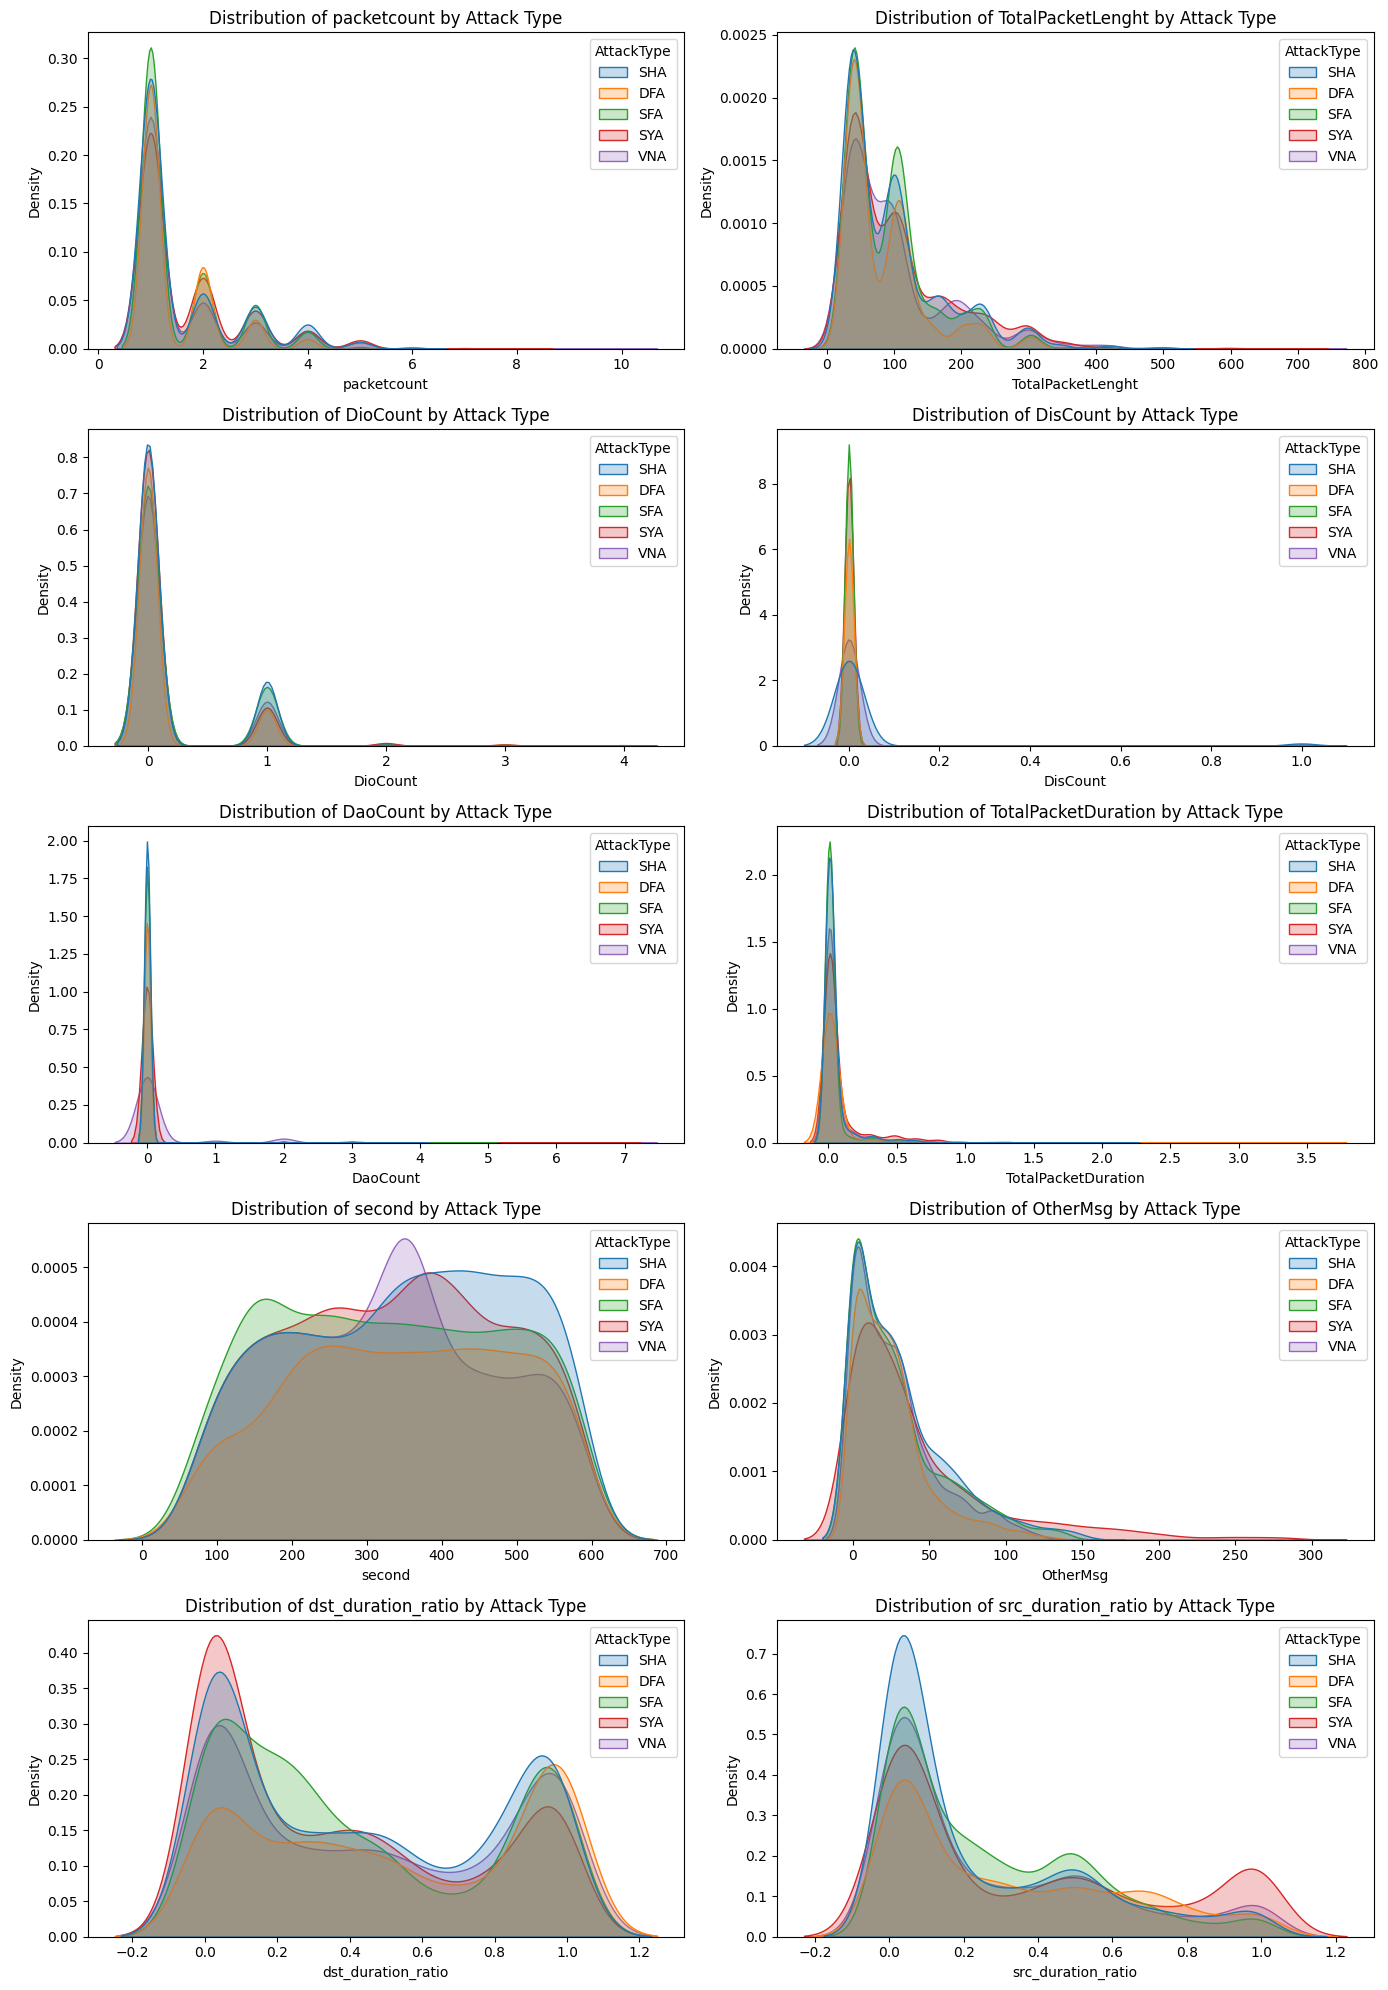

In [19]:
num_cols = ['packetcount','TotalPacketLenght','DioCount','DisCount',
            'DaoCount','TotalPacketDuration','second','OtherMsg',
            'dst_duration_ratio','src_duration_ratio']


# Create subplots: 5 rows, 2 columns (to accommodate 9 plots)
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 20))
axes = axes.flatten()  # Flatten to easily iterate

for i, col in enumerate(num_cols):
    sns.kdeplot(data=dataset, x=col, hue='AttackType', fill=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Attack Type')

# Hide the 10th subplot if it exists (since we only have 9 plots)
if len(axes) > len(num_cols):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

## Pairwise Feature Visualization

Use pairplot for a few selected features:

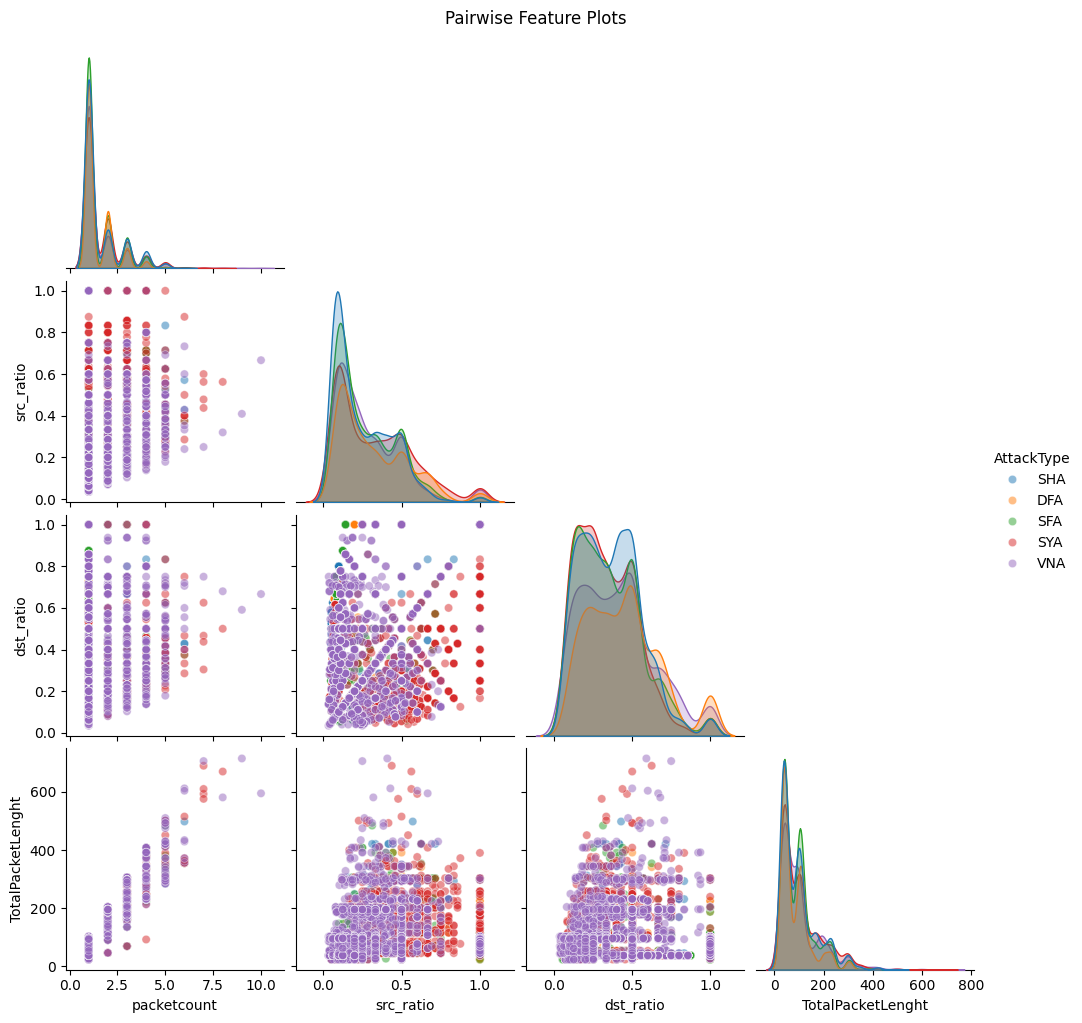

In [ ]:
sns.pairplot(dataset, vars=['packetcount', 'src_ratio', 'dst_ratio', 'TotalPacketLenght'],
             hue='AttackType', corner=True, plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Feature Plots', y=1.02)
plt.show()

## Time-based Patterns

If the second column, is Simulation time in seconds when the packet or event was recorded. Useful for time-series or temporal pattern detection. Lets explore attacks over time:

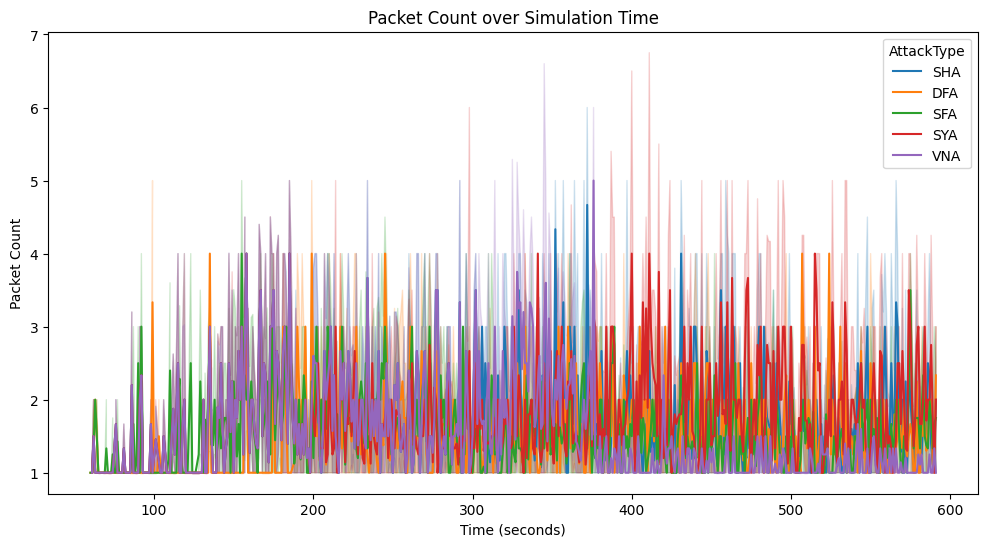

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=dataset, x='second', y='packetcount', hue='AttackType')
plt.title('Packet Count over Simulation Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Packet Count')
plt.show()

## Summary Statistics per Attack


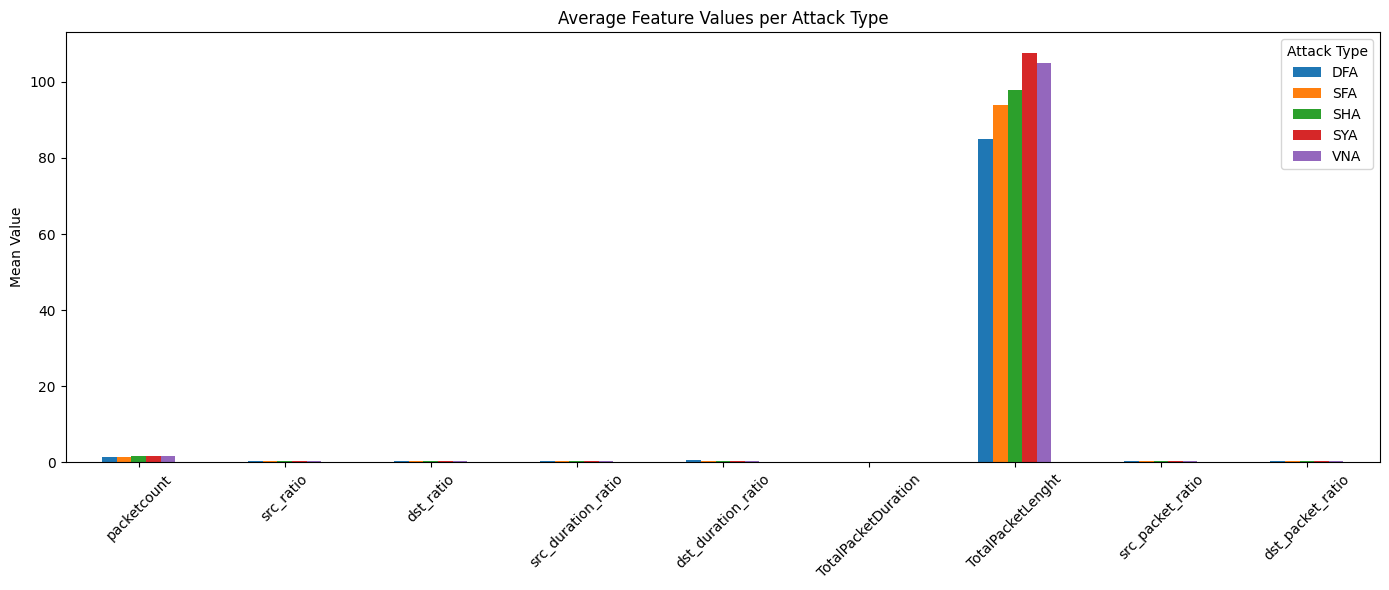

In [ ]:
dataset['AttackType'] = dataset['label'].map(attack_map)

dataset.groupby('AttackType')[num_cols].mean().T.plot(kind='bar', figsize=(14, 6))
plt.title('Average Feature Values per Attack Type')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.legend(title='Attack Type')
plt.tight_layout()
plt.show()



#Task 2: Develop Machine learning

## 🧠 Building, Training, and Evaluating a Multiclass Classification Model

In this section, we develop a machine learning model to predict the type of network attack based on a set of selected features. The task involves multiclass classification, as the target variable 'AttackType' includes more than two distinct categories (e.g., SFA, SHA, VNA, etc.).

**🎯 Target Variable:**

  >	'AttackType' — represents the specific type of cyber attack or a benign case.


**Input features:**

['packetcount', 'TotalPacketLenght', 'DioCount', 'DisCount',
 'DaoCount', 'TotalPacketDuration', 'second', 'OtherMsg',
 'dst_duration_ratio', 'src_duration_ratio']



We will train a classification model using these features and evaluate its ability to distinguish between multiple attack types. Logistic Regression, using a multiclass classification strategy such as One-vs-Rest (OvR), will be appropriate for this task

The model’s performance will be assessed using standard metrics such as accuracy, precision, recall, and F1-score, specifically adapted for multiclass scenarios.

**Prepare the data**

Just as for binary classification, before training the model, we need to separate the features and label, and then split the data into subsets for training and validation. We'll also apply a stratification technique when splitting the data to maintain the proportion of each label value in the training and validation datasets.

In [21]:

from sklearn.model_selection import train_test_split

attack_features= ['packetcount', 'TotalPacketLenght', 'DioCount', 'DisCount',
                   'DaoCount', 'TotalPacketDuration', 'second', 'OtherMsg',
                   'dst_duration_ratio', 'src_duration_ratio']

attack_label = 'AttackType'
# Separate features and labels
attack_X, attack_y = dataset[attack_features].values, dataset[attack_label].values

# Split data 70%-30% into training set and test set
x_attack_train, x_attack_test, y_attack_train, y_attack_test = train_test_split(attack_X, attack_y,
                                                                                    test_size=0.30,
                                                                                    random_state=0,
                                                                                    stratify=attack_y)

print ('Training Set: %d, Test Set: %d \n' % (x_attack_train.shape[0], x_attack_test.shape[0]))

Training Set: 7591, Test Set: 3254 



**Train and evaluate a multiclass classifier**

Now that we have a set of training features and corresponding training labels, we can fit a multiclass classification algorithm to the data to create a model.

In [22]:

from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# train a logistic regression model on the training set
multi_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000).fit(x_attack_train, y_attack_train)
print (multi_model)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10.0, max_iter=10000, multi_class='auto')


Now we can use the trained model to predict the labels for the test features, and compare the predicted labels to the actual labels.

In [23]:
attack_predictions = multi_model.predict(x_attack_test)
print('Predicted labels: ', attack_predictions[:15])
print('Actual labels   : ', y_attack_test[:15])

Predicted labels:  ['DFA' 'SHA' 'SHA' 'SHA' 'SHA' 'DFA' 'SFA' 'SYA' 'DFA' 'DFA' 'SYA' 'SFA'
 'SYA' 'DFA' 'SFA']
Actual labels   :  ['DFA' 'DFA' 'SHA' 'SFA' 'SHA' 'VNA' 'SYA' 'SFA' 'VNA' 'SHA' 'SHA' 'SYA'
 'SHA' 'SHA' 'DFA']


Let's look at a classification report.

In [24]:
from sklearn. metrics import classification_report

print(classification_report(y_attack_test, attack_predictions))

              precision    recall  f1-score   support

         DFA       0.32      0.31      0.31       543
         SFA       0.27      0.22      0.24       677
         SHA       0.31      0.48      0.38       721
         SYA       0.31      0.40      0.35       682
         VNA       0.48      0.17      0.25       631

    accuracy                           0.32      3254
   macro avg       0.34      0.31      0.31      3254
weighted avg       0.34      0.32      0.31      3254



We can get the overall metrics separately from the report using the Scikit-Learn metrics score classes, but with multiclass results we must specify which average metric to use for precision and recall.

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Overall Accuracy:",accuracy_score(y_attack_test, attack_predictions))
print("Overall Precision:",precision_score(y_attack_test, attack_predictions, average='macro'))
print("Overall Recall:",recall_score(y_attack_test, attack_predictions, average='macro'))

Overall Accuracy: 0.3189920098340504
Overall Precision: 0.34023585848195
Overall Recall: 0.31423415360086404


In [27]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
mcm = confusion_matrix(y_attack_test, attack_predictions)
print(mcm)

[[166  80 167 100  30]
 [ 96 147 197 201  36]
 [ 77  97 347 170  30]
 [ 68  95 228 270  21]
 [104 122 178 119 108]]


The confusion matrix shows the intersection of predicted and actual label values for each class, where the diagonal intersections from top-left to bottom-right indicate the number of correct predictions.

When dealing with multiple classes, it's generally more intuitive to visualize this as a heat map.

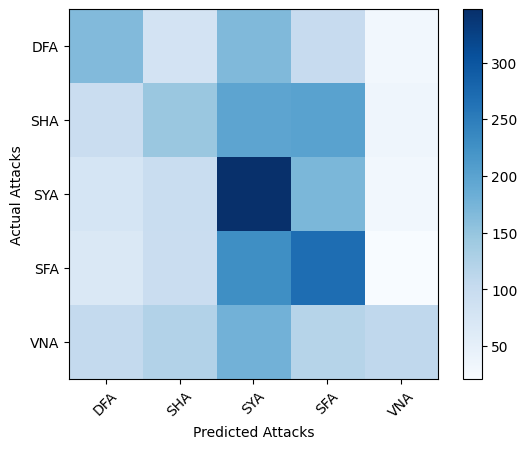

In [36]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


attack_classes = ['DFA', 'SHA', 'SYA', 'SFA', 'VNA']

plt.imshow(mcm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(attack_classes))
plt.xticks(tick_marks, attack_classes, rotation=45)
plt.yticks(tick_marks, attack_classes)
plt.xlabel("Predicted Attacks")
plt.ylabel("Actual Attacks")
plt.show()

The darker squares in the confusion matrix plot indicate high numbers of cases, and you can hopefully see a diagonal line of darker squares indicating cases where the predicted and actual label are the same.

In the case of a multiclass classification model, a single ROC curve showing true positive rate vs false positive rate is not possible. However, you can use the rates for each class in a One vs Rest (OVR) comparison to create a ROC chart for each class.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


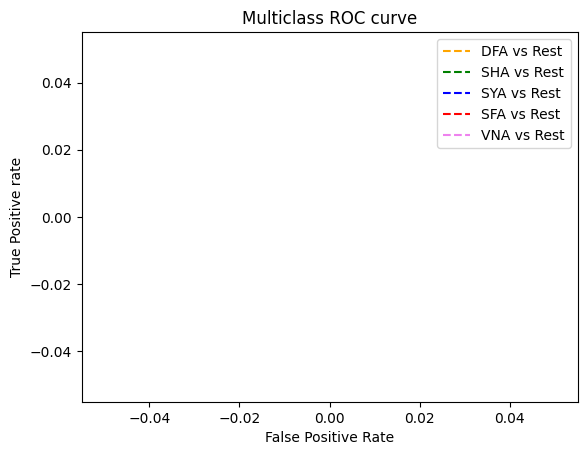

In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Get class probability scores
attack_prob = multi_model.predict_proba(x_attack_test)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(attack_classes)):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_attack_test, attack_prob[:,i], pos_label=i)

# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=attack_classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=attack_classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=attack_classes[2] + ' vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='red', label=attack_classes[3] + ' vs Rest')
plt.plot(fpr[4], tpr[4], linestyle='--',color='violet', label=attack_classes[4] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

To quantify the ROC performance, you can calculate an aggregate area under the curve score that is averaged across all of the OVR curves.

In [38]:
auc = roc_auc_score(y_attack_test, attack_prob, multi_class='ovr')
print('Average AUC:', auc)

Average AUC: 0.6275190713469007


**Use the model with new data observations**

Save our newest trained model so we can use it again later.

In [39]:
import joblib

# Save the model as a pickle file
filename = './attack_model.pkl'
joblib.dump(multi_model, filename)

['./attack_model.pkl']

Now let's use the model to predict the class of a new penguin observation.


In [42]:
x_attack_test[0]

array([2.00000000e+00, 1.15000000e+02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 5.67626953e-03, 5.32000000e+02, 3.60000000e+01,
       5.77586230e-01, 4.00862070e-01])

In [47]:
# Load the model from the file
multi_model = joblib.load(filename)

# The model accepts an array of feature arrays (so you can predict the classes of multiple penguin observations in a single call)
# We'll create an array with a single array of features, representing one penguin
x_new = np.array([[2, 1.15, 0.02, 0.4, 2, 5.6, 5.3, 3.6, 5.7, 4]])

print ('New sample: {}'.format(x_new[0]))

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one penguin, so our prediction is the first one in the resulting array.
attack_pred = multi_model.predict(x_new)[0]
print('Predicted class is', attack_pred)

New sample: [2.   1.15 0.02 0.4  2.   5.6  5.3  3.6  5.7  4.  ]
Predicted class is SYA
